In [3]:
%load_ext autoreload
%autoreload 2


from torch.utils.data import DataLoader, Dataset

import sys
sys.path.append('../')

from cont_speech_experiment import ContinuousSpeechExperiment
from nupic.research.support import parse_config

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
data_dir = "/home/ec2-user/nta/data/data_classes/"
test_dir = "/home/ec2-user/nta/data/"
config_file = "../experiments.cfg"
exp = "SuperSparseCNN2"
config_init = parse_config(config_file)
config = config_init[exp]
config["name"] = exp
config["seed"] = 42
config["data_dir"] = data_dir

In [88]:
experiment = ContinuousSpeechExperiment(config=config)
print(config["batch_size"])

Creating optimizer with learning rate= 0.01
16


In [ ]:
accs = [] # test loss
ent = [] # entropy
class_acc = []
t_acc = []

epochs = 4
config_init = parse_config(config_file)

for expname in ["denseCNN2", "sparseCNN2", "SuperSparseCNN2", "denseSmall1", "denseSmall2"]:
    config = config_init[expname]
    config["name"] = expname
    config["seed"] = 42
    config["data_dir"] = data_dir
    experiment = ContinuousSpeechExperiment(config=config)

    for label in range(0,11):
        print("training on class {}".format(label))
        for epoch in range(epochs):
            print("training: epoch {}".format(epoch+1))
            experiment.train(epoch, label)   
            mt = experiment.test()
            t_acc.append(mt["mean_accuracy"])

        ct = [experiment.test_class(k)["mean_accuracy"] for k in range(0,11)]
        class_acc.append(ct)

        t = experiment.test()
        accs.append(t["mean_accuracy"])
        ent.append(np.round(t["entropy"]))

Creating optimizer with learning rate= 0.01
training on class 0
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 1
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 2
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 3
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 4
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 5
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 6
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 7
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 8
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 9
training: epoch 1
training: epoch 2
training: epoch 3
training: epoch 4
training on class 10
training: epoch

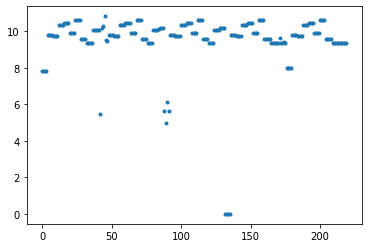

In [107]:
plt.plot(t_acc, '.')

Text(0, 0.5, 'mean_accuracy')

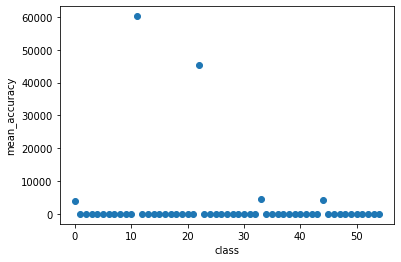

In [108]:
plt.plot(accs,'o')
plt.xlabel('class')
plt.ylabel('mean_accuracy')
# plt.ylim((4.5, 15.5))

Text(0, 0.5, 'mean accuracy')

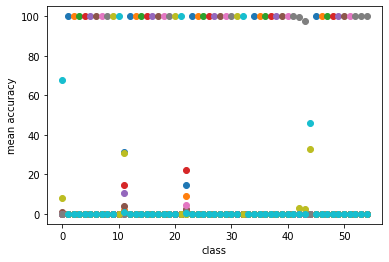

In [109]:
plt.plot(class_acc, 'o')
plt.xlabel('class')
plt.ylabel('mean accuracy')
# plt.ylim((5., 20.))

Text(0, 0.5, 'entropy')

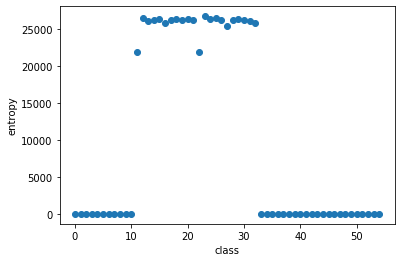

In [110]:
plt.plot(ent, 'o')
plt.xlabel('class')
plt.ylabel('entropy')

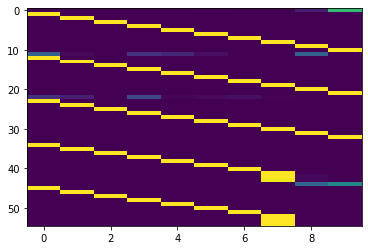

In [112]:
plt.imshow(class_acc, aspect="auto")